## Import Libraries

In [1]:
# Library to support working with data
import pandas as pd
import numpy as np

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Performance metrics calculation support library
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error

# Graphing support library
from matplotlib import ticker
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AZN-AstraZeneca.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,41.610001,41.759998,41.480000,41.759998,36.845528,4590000
1,2019-03-04,41.730000,41.810001,41.389999,41.689999,36.783760,3948200
2,2019-03-05,41.560001,42.610001,41.560001,42.310001,37.330803,5668200
3,2019-03-06,42.360001,42.389999,41.930000,42.029999,37.083748,2490000
4,2019-03-07,41.610001,41.770000,41.330002,41.660000,36.757298,5283900
...,...,...,...,...,...,...,...
1254,2024-02-23,64.959999,65.930000,64.949997,65.830002,65.830002,7388200
1255,2024-02-26,66.080002,66.370003,65.750000,65.930000,65.930000,4597900
1256,2024-02-27,65.940002,66.459999,65.769997,66.330002,66.330002,4433500
1257,2024-02-28,65.459999,65.779999,65.160004,65.349998,65.349998,6030600


## Reset index

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [4]:
# Select the Close column as the dependent variable
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

## Data normalization

In [5]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

## Data splitting

In [6]:
# Split the data into training, validation and test dataset in a ratio of 6:2:2
train_size = int(0.7 * len(data_scaled))
val_size = int(0.1 * len(data_scaled))
test_size = len(data_scaled) - train_size - val_size

train_data = data_scaled[: train_size]
val_data = data_scaled[train_size : train_size + val_size]
test_data = data_scaled[train_size + val_size :]

## Model training and testing

In [7]:
pip install blosc2~=2.0.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Install library pmdarima
!pip install pmdarima

## Training process

In [9]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [10]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4075.778, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4075.052, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4082.531, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4082.291, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4076.240, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4080.599, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4080.597, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4078.655, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4083.516, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-4081.603, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-4081.598, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4083.260, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-4079.397, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.196 seconds


In [11]:
# Fit the model
model.fit(y_train)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## Validate Processing

In [12]:
# Preparing validation data
x_val = np.array(range(train_size, train_size + val_size)).reshape(-1, 1)
y_val = np.array(val_data).reshape(-1)
y_pred_val = model.predict(n_periods = len(y_val))

## Testing Processing

In [13]:
x_test = np.array(range(test_size, train_size + val_size + test_size)).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred = model.predict(n_periods=len(y_test))

## Evaluate Model

In [14]:
# Evaluate the accuracy of validation
y_val = scaler.inverse_transform(np.array([y_val]).reshape(-1, 1))
y_pred_val = scaler.inverse_transform(np.array([y_pred_val]).reshape(-1, 1))

val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(y_val, y_pred_val)

print(f"MAPE on Validate set: ", val_mape)
print(f"RMSE on Validate set: ", val_rmse)
print(f"MSLE on Validate set: ", val_msle)

MAPE on Validate set:  0.08291661643204967
RMSE on Validate set:  6.247449331905818
MSLE on Validate set:  0.00993222650643317


In [15]:
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSLE on Test dataset: ", test_msle)

MAPE on Test dataset:  0.044674404602489524
RMSE on Test dataset:  4.061099526002309
MSLE on Test dataset:  0.003339438883219318


# Predicting the next 90 days

## Preparing the prediction data

In [16]:
# The process of creating index predict next 90 days
last_index =  df_Close.index[-1]

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

## Prediction process

In [17]:
# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days.flatten())

Predicted closing prices for the next 90 days:
[66.51927683 66.49880713 66.50090978 66.50069379 66.50071598 66.5007137
 66.50071393 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391 66.50071391
 66.5

## Preparing the forecast date index

In [18]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 90 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

## Visualization

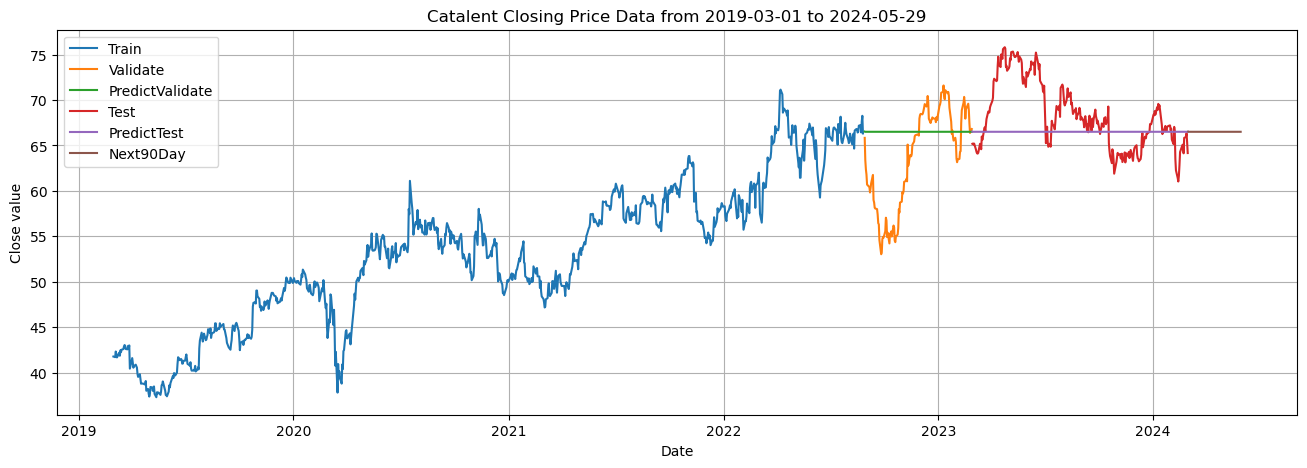

In [19]:
# Drawing
plt.figure(figsize=(16, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))

plt.plot(df.index[train_size : train_size + val_size], y_val)

plt.plot(df.index[train_size : train_size + val_size], y_pred_val)

plt.plot(df.index[train_size + val_size :], y_test)

plt.plot(df.index[train_size + val_size :], y_pred)

plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Validate', 'PredictValidate', 'Test', 'PredictTest', 'Next90Day'])

plt.grid()
plt.title(f"Catalent Closing Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('image/ARIMA_712_90day_AZN.png')
plt.show()